# **Malware Detection**

>  Machine learning with reference to Cloud Computing



**Malware**

> Malware often known as malicious software, is any programme or file designed to harm a computer, network, or server.

**Examples**

> Computer viruses, worms, Trojan horses, ransomware, and spyware are examples of malware. These harmful programmes steal, encrypt, and erase important information, as well as altering or hijacking essential computing processes and monitoring end users' computer behavior.

**Malware Detection**


> Every cybersecurity product needs a malware recognition module that is efficient, reliable, and scalable. Based on the data they've gathered, malware identification modules determine whether or not an object is a threat. This information can be gathered in several stages:


> 

*   **Pre-execution phase** data refers to information about a file that may be gleaned without running it. This could comprise executable file format descriptions, code descriptions, binary data statistics, text strings, and information retrieved through code emulation, among other things.
*   **Post-execution phase** data offers information about the behavior or events that occur as a result of process activity in a system.



> Manually constructed detection rules weren't any more practicable due to the rapid growth of the Internet and the resulting surge in malware, necessitating the development of new, powerful protection solutions.
Machine learning is now used by anti-malware businesses to improve malware detection using multiple types of data on host, network, and cloud-based anti-malware components.

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics, tree, neighbors, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/Malware dataset.csv') 
data_set

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [ ]:
data_set.shape

(100000, 35)

In [ ]:
data_set.dtypes

hash                 object
millisecond           int64
classification       object
state                 int64
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
policy                int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
cached_hole_size      int64
free_area_cache       int64
mm_users              int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
end_data              int64
last_interval         int64
nvcsw                 int64
nivcsw                int64
min_flt               int64
maj_flt               int64
fs_excl_counter       int64
lock                  int64
utime                 int64
stime                 int64
gtime                 int64
cgtime                int64
signal_nvcsw          int64
dtype: object

In [ ]:
data_set.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [ ]:
data_set.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [ ]:
data_set.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

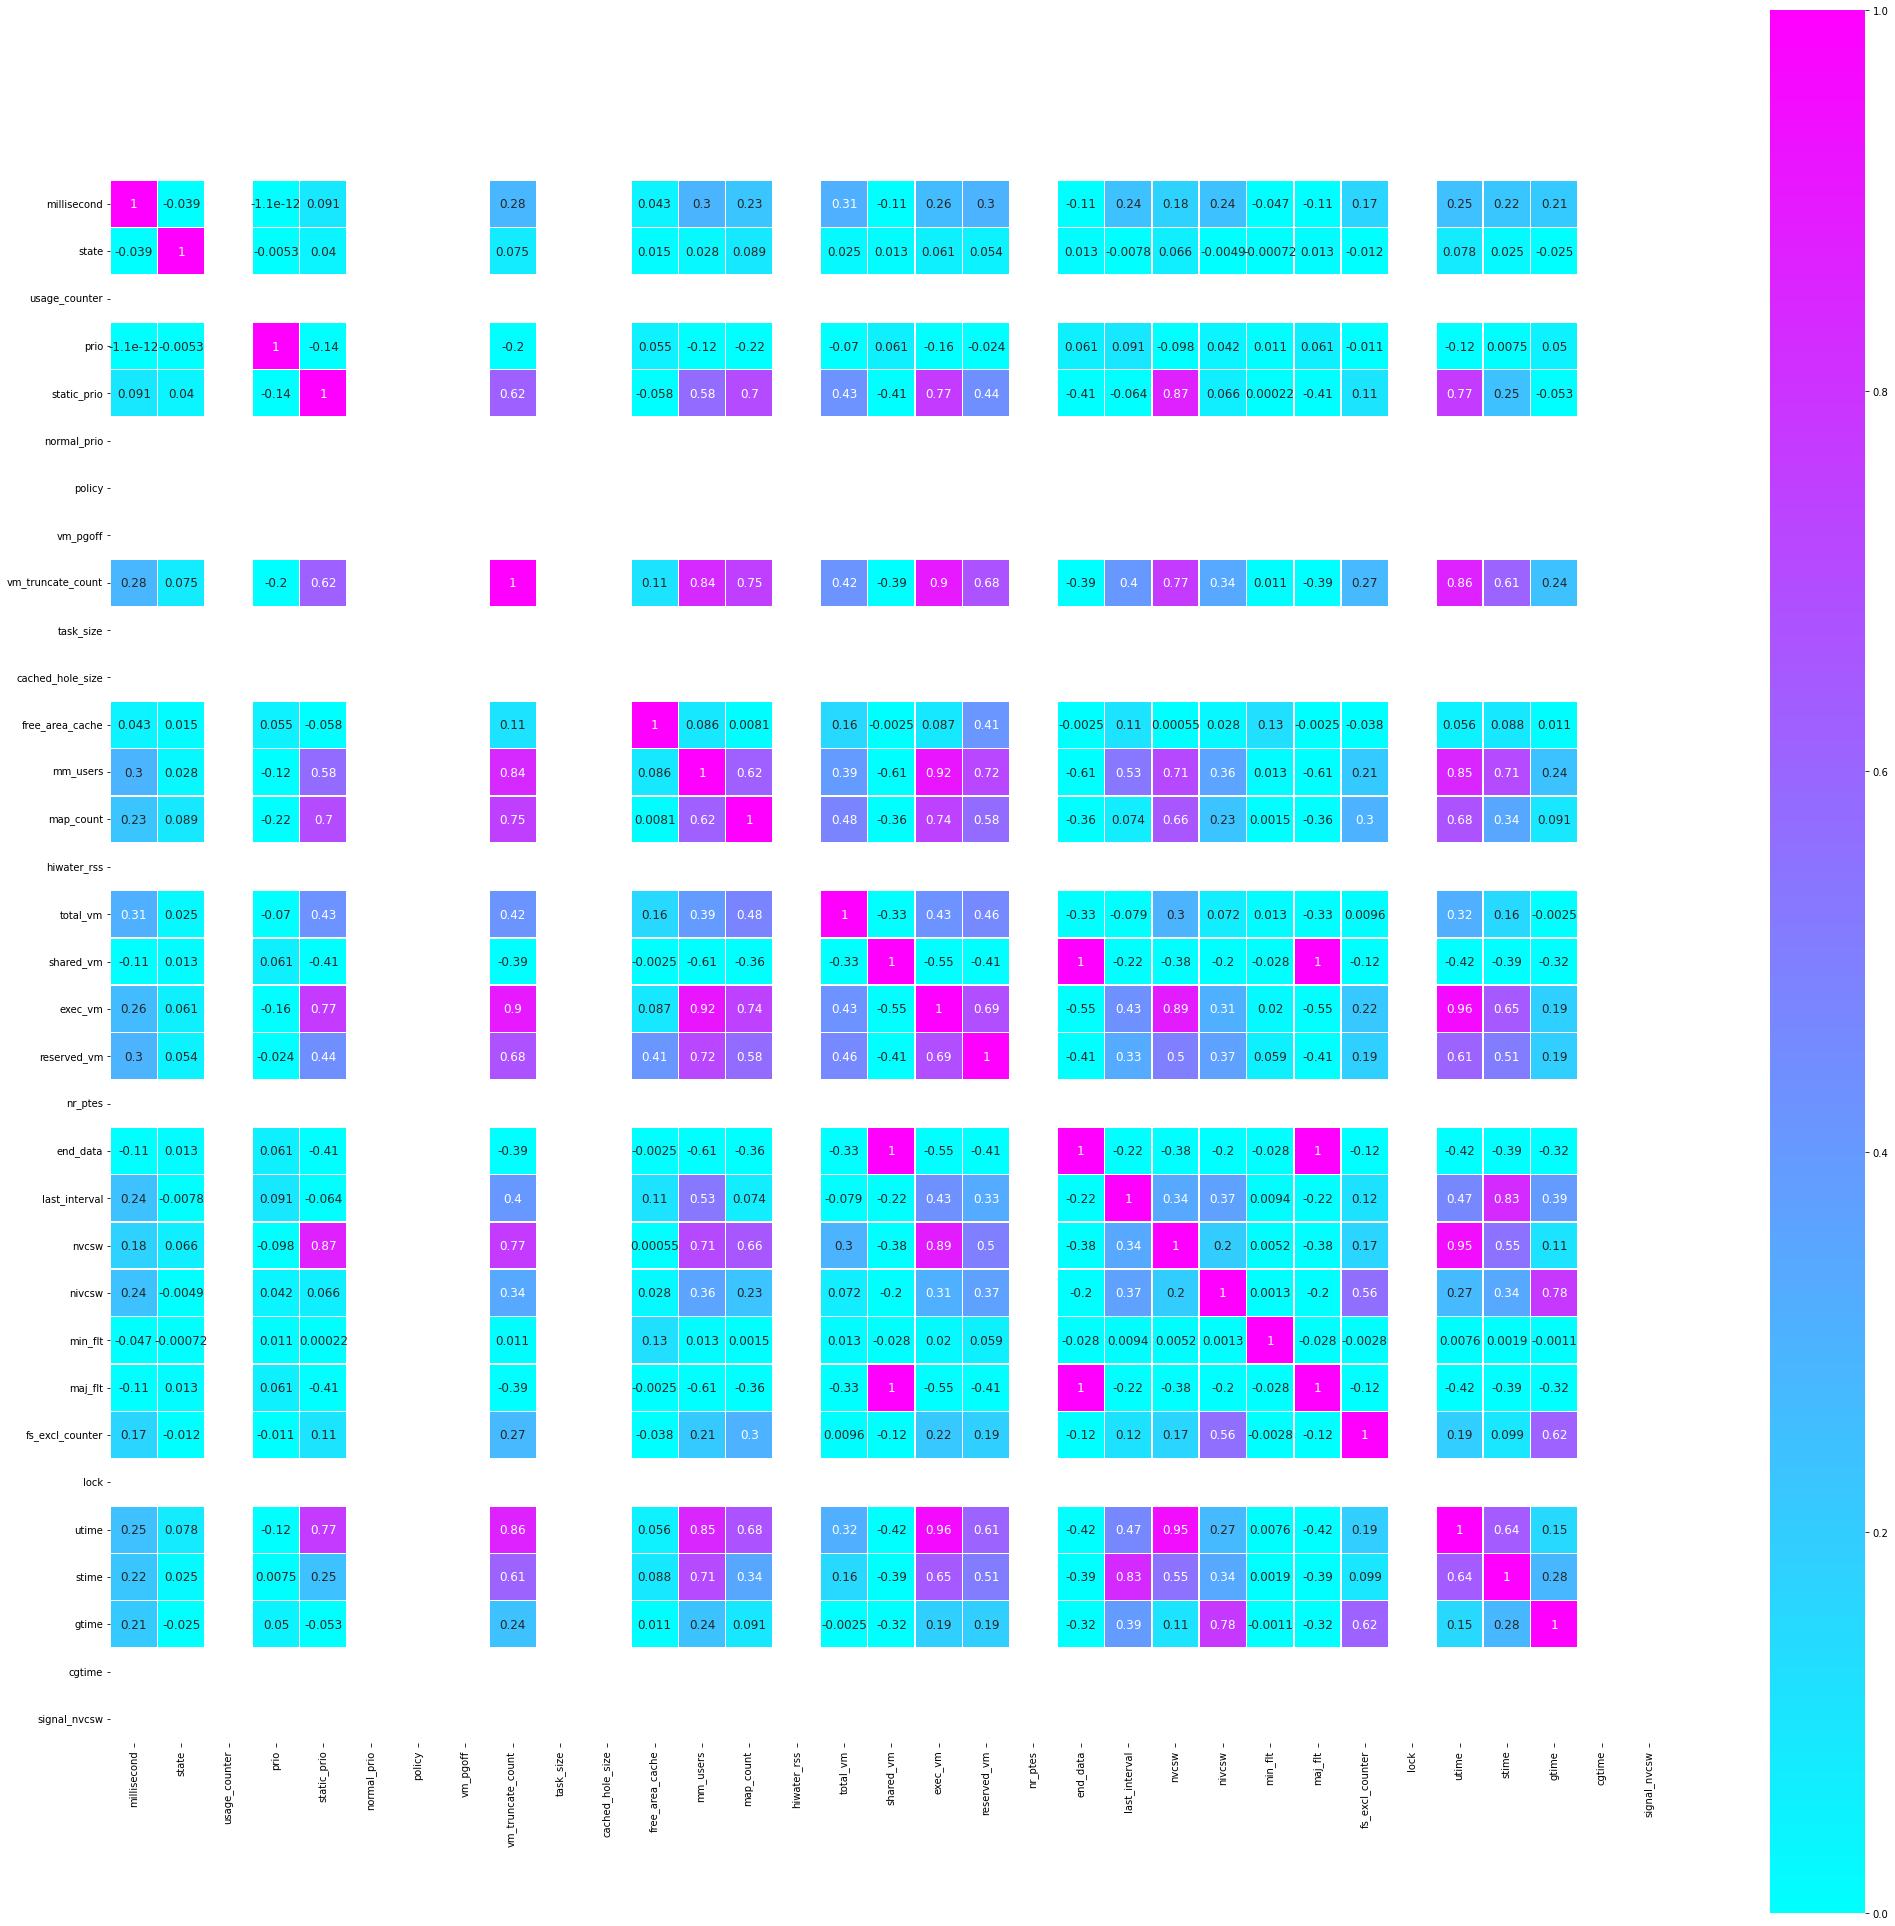

In [ ]:
# PLOTTING HEATMAP
fig, ax = plt.subplots(figsize = (35, 35))
ax = sns.heatmap(data_set.corr(), square = True, annot = True, linewidths = 0.5, vmin = 0, vmax = 1, cmap = "cool", annot_kws = {'fontsize': 12}, cbar='true')
plt.show()

In [ ]:
data1=data_set.dropna(how="any",axis=0)
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
data1["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

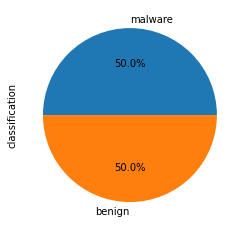

In [ ]:
data1["classification"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [ ]:
data1=data1.drop(["hash",'usage_counter','normal_prio', 'policy','vm_pgoff', 'cached_hole_size', 'hiwater_rss','task_size','nr_ptes', 'lock','cgtime', 'signal_nvcsw'],axis=1)
data1.head()

,millisecond,classification,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
0,0,malware,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
1,1,malware,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
2,2,malware,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
3,3,malware,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0
4,4,malware,0,3069378560,14274,13173,24,724,6850,150,...,120,3473,341974,0,0,120,0,380690,4,0


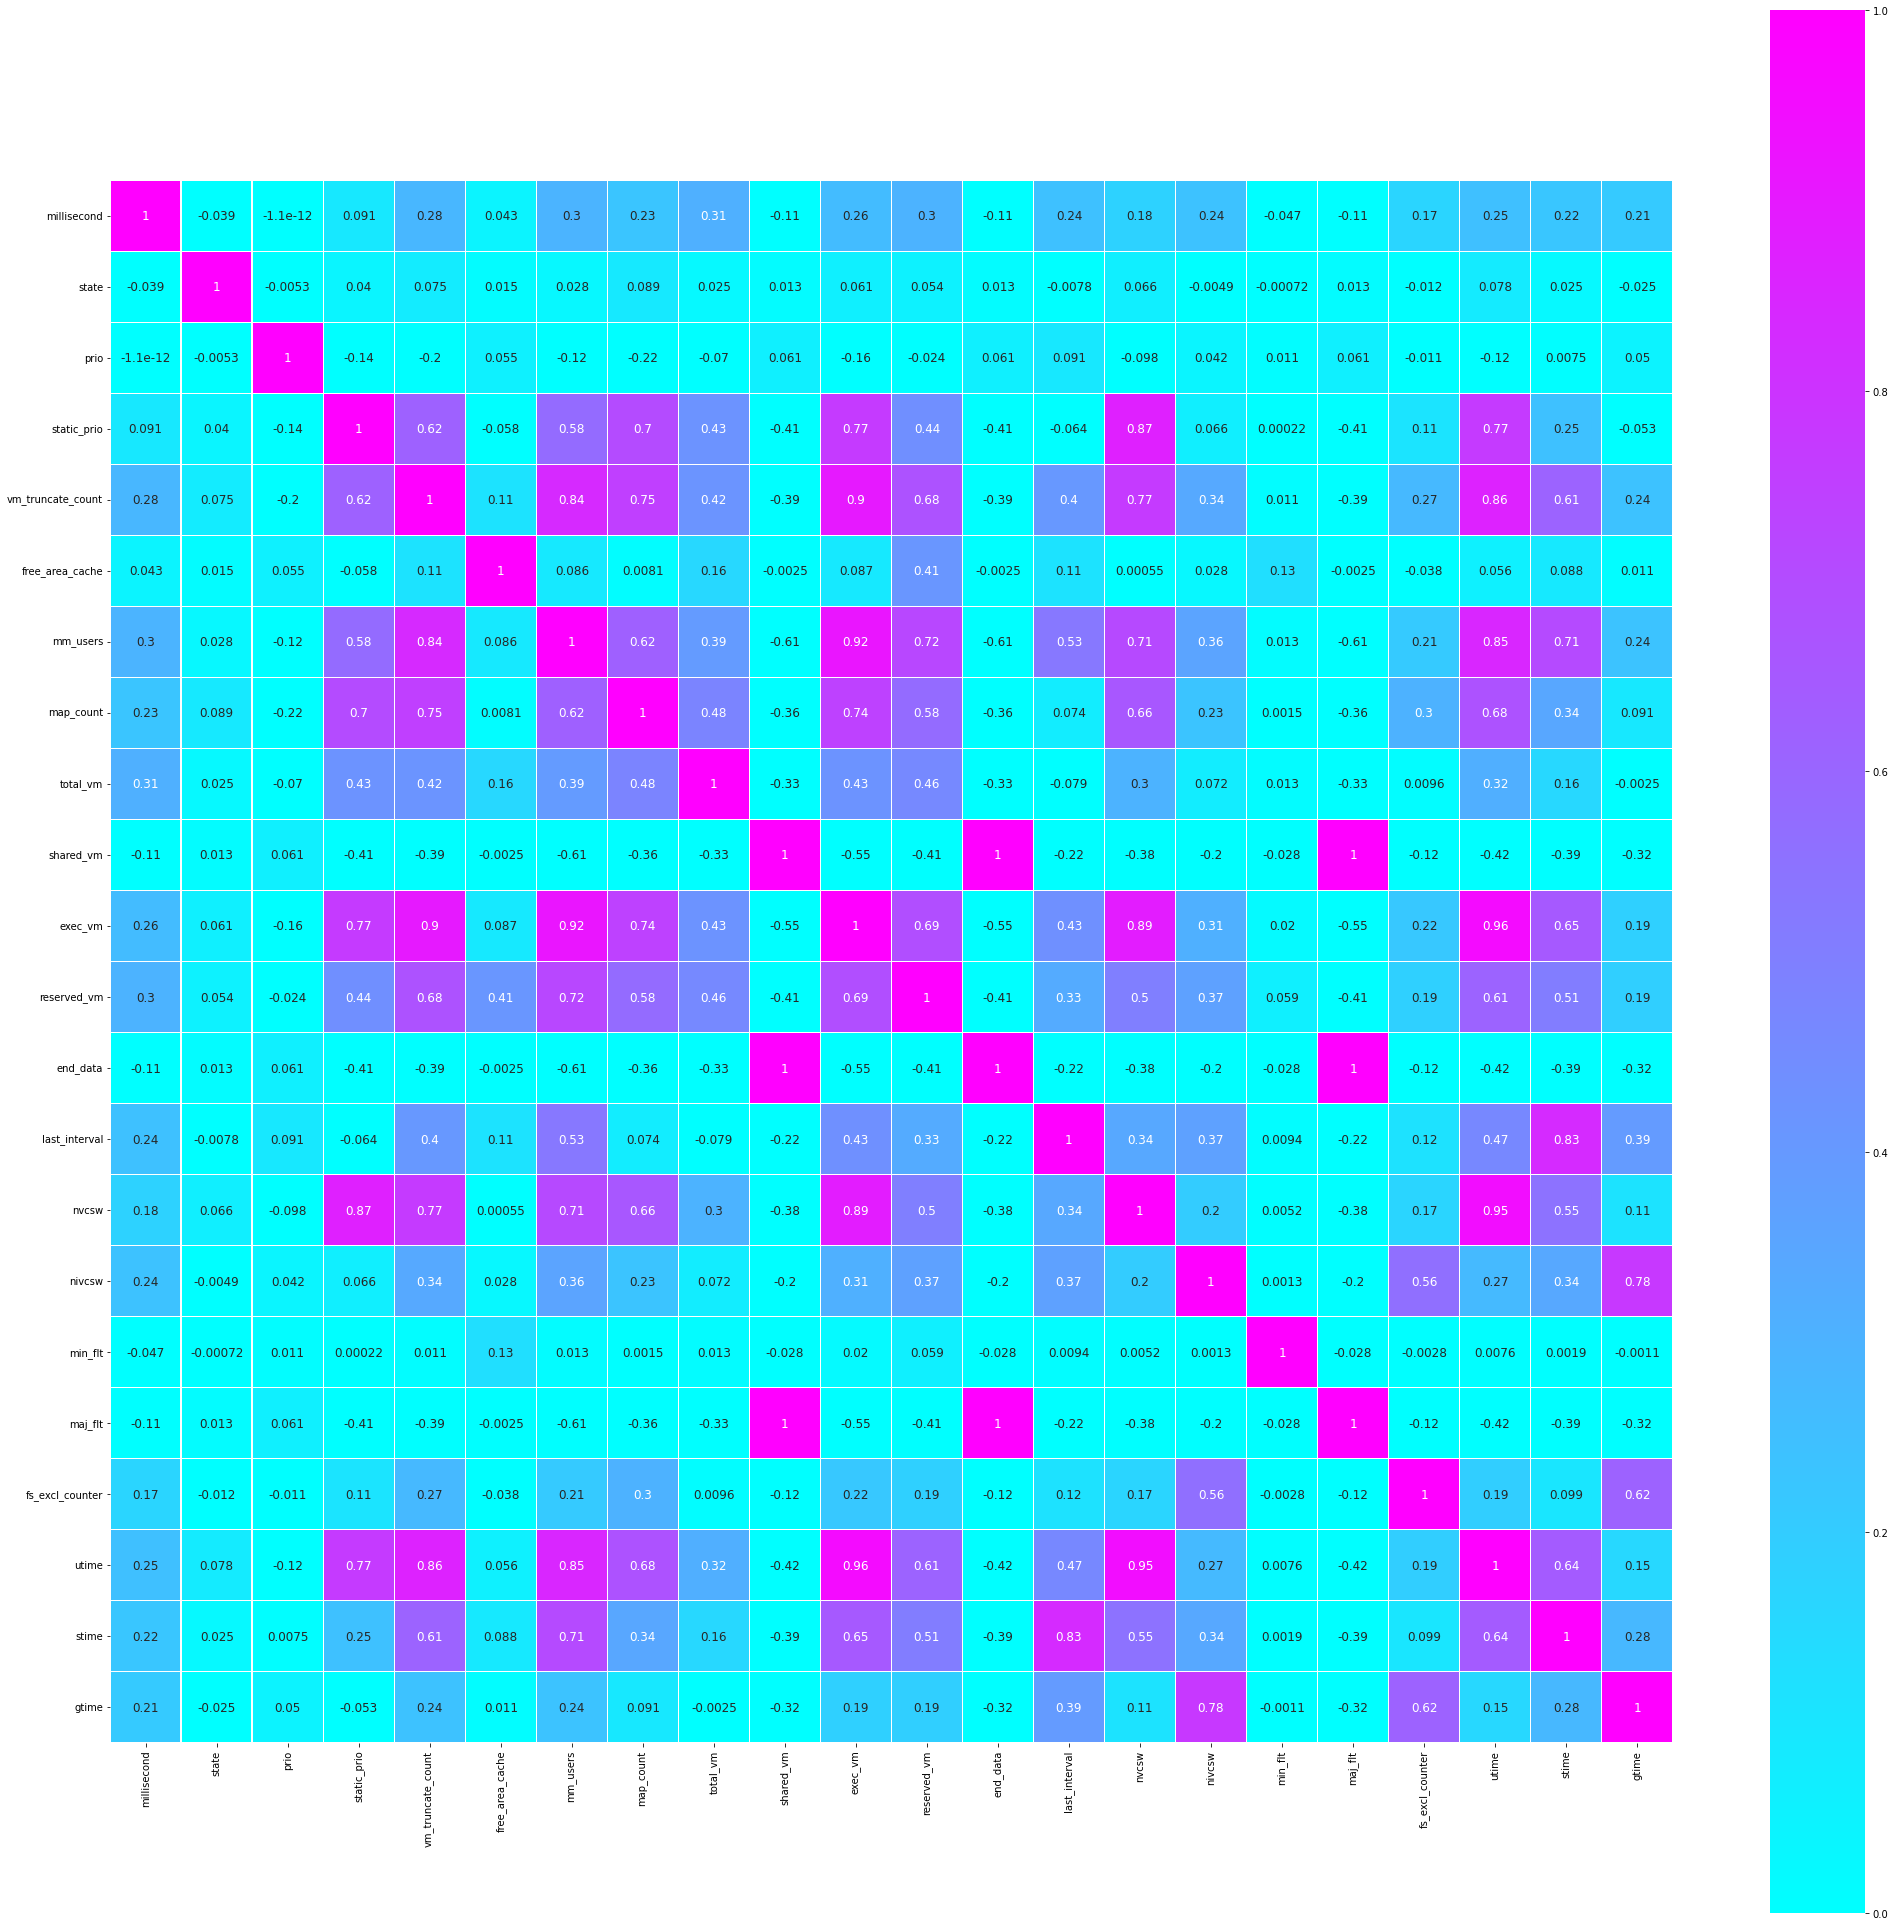

In [ ]:
fig, ax = plt.subplots(figsize = (35, 35))
ax = sns.heatmap(data1.corr(), square = True, annot = True, linewidths = 0.5, vmin = 0, vmax = 1, cmap = "cool", annot_kws = {'fontsize': 12}, cbar='true')
plt.show()

In [ ]:
X=data1.drop(["classification"], axis=1)
X.head()

,millisecond,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,shared_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
0,0,0,3069378560,14274,13173,24,724,6850,150,120,...,120,3473,341974,0,0,120,0,380690,4,0
1,1,0,3069378560,14274,13173,24,724,6850,150,120,...,120,3473,341974,0,0,120,0,380690,4,0
2,2,0,3069378560,14274,13173,24,724,6850,150,120,...,120,3473,341974,0,0,120,0,380690,4,0
3,3,0,3069378560,14274,13173,24,724,6850,150,120,...,120,3473,341974,0,0,120,0,380690,4,0
4,4,0,3069378560,14274,13173,24,724,6850,150,120,...,120,3473,341974,0,0,120,0,380690,4,0


In [ ]:
y=data1["classification"]
y

0        malware
1        malware
2        malware
3        malware
4        malware
          ...   
99995    malware
99996    malware
99997    malware
99998    malware
99999    malware
Name: classification, Length: 100000, dtype: object

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
accuracy_train = list()
accuracy = list()

**GAUSSIAN NAIVE BAYES**

In [ ]:
gaussian_obj = GaussianNB()
trained_model = gaussian_obj.fit(X_train, y_train)

predictions = trained_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, predictions) 

accuracy_train.append(gaussian_obj.score(X_train, y_train)*100)
accuracy.append(gaussian_obj.score(X_test, y_test)*100)
print(gaussian_obj.score(X_train, y_train))
print(gaussian_obj.score(X_test, y_test))

print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6178285714285714
0.6191666666666666
[[ 6041  9009]
 [ 2416 12534]]
              precision    recall  f1-score   support

      benign       0.71      0.40      0.51     15050
     malware       0.58      0.84      0.69     14950

    accuracy                           0.62     30000
   macro avg       0.65      0.62      0.60     30000
weighted avg       0.65      0.62      0.60     30000



In [ ]:
print(accuracy_train)
print(accuracy)

[61.78285714285714]
[61.916666666666664]


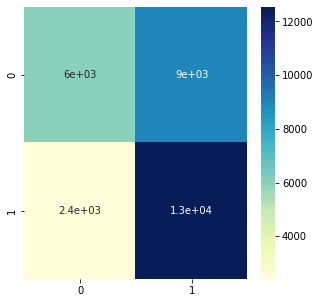

In [ ]:
plt.figure(figsize = (5, 5))
sns.heatmap(confusion_mat, annot = True, cmap = "YlGnBu")

**MULTINOMIAL NAIVE BAYES**

In [ ]:
multinomial_obj = MultinomialNB()
trained_model = multinomial_obj.fit(X, y)

predictions = trained_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, predictions) 

accuracy_train.append(multinomial_obj.score(X_train, y_train)*100)
accuracy.append(multinomial_obj.score(X_test, y_test)*100)
print(multinomial_obj.score(X_train, y_train))
print(multinomial_obj.score(X_test, y_test))

print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5171
0.5217
[[ 2002 13048]
 [ 1301 13649]]
              precision    recall  f1-score   support

      benign       0.61      0.13      0.22     15050
     malware       0.51      0.91      0.66     14950

    accuracy                           0.52     30000
   macro avg       0.56      0.52      0.44     30000
weighted avg       0.56      0.52      0.44     30000



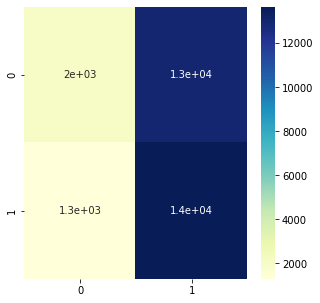

In [ ]:
plt.figure(figsize = (5, 5))
sns.heatmap(confusion_mat, annot = True, cmap = "YlGnBu")

In [ ]:
print(accuracy_train)
print(accuracy)

[61.78285714285714, 51.71]
[61.916666666666664, 52.17]


**DECISION TREE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

obj_1 = DecisionTreeClassifier()
#CROSS VALIDATION USING GRID CONSIDERING THE TUNING OF SPECIFIC HYPERPARAMETERS

grid = [{'max_depth' : [2, 3, 4, 5, 10, 20, 50], 'criterion' : ['entropy', 'gini'], 'max_leaf_nodes' : [2, 3, 4, 10, 20, 50]}]

grid_obj = GridSearchCV(obj_1, grid, cv = 2)
trained_model = grid_obj.fit(X_train, y_train)
print(grid_obj)
print(grid_obj.best_params_)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 4, 5, 10, 20, 50],
                          'max_leaf_nodes': [2, 3, 4, 10, 20, 50]}])
{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 50}


In [ ]:
obj_1 = DecisionTreeClassifier(criterion = grid_obj.best_params_['criterion'], max_depth = grid_obj.best_params_['max_depth'], max_leaf_nodes = grid_obj.best_params_['max_leaf_nodes'])

trained_model = obj_1.fit(X_train, y_train)

predictions = trained_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, predictions)

accuracy_train.append(obj_1.score(X_train, y_train)*100)
accuracy.append(obj_1.score(X_test, y_test)*100)
print(obj_1.score(X_train, y_train))
print(obj_1.score(X_test, y_test))

print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
1.0
[[15083     0]
 [    0 14917]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     15083
     malware       1.00      1.00      1.00     14917

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [ ]:
text_representation = tree.export_text(obj_1)
print(text_representation)

|--- feature_3 <= 15423.00
|   |--- feature_19 <= 376086.50
|   |   |--- class: malware
|   |--- feature_19 >  376086.50
|   |   |--- feature_5 <= 2.00
|   |   |   |--- feature_6 <= 759.50
|   |   |   |   |--- feature_11 <= 151.50
|   |   |   |   |   |--- feature_14 <= 342111.50
|   |   |   |   |   |   |--- feature_3 <= 14616.50
|   |   |   |   |   |   |   |--- class: malware
|   |   |   |   |   |   |--- feature_3 >  14616.50
|   |   |   |   |   |   |   |--- class: benign
|   |   |   |   |   |--- feature_14 >  342111.50
|   |   |   |   |   |   |--- feature_4 <= 18073.50
|   |   |   |   |   |   |   |--- class: malware
|   |   |   |   |   |   |--- feature_4 >  18073.50
|   |   |   |   |   |   |   |--- class: benign
|   |   |   |   |--- feature_11 >  151.50
|   |   |   |   |   |--- feature_4 <= 13292.00
|   |   |   |   |   |   |--- feature_3 <= 14301.00
|   |   |   |   |   |   |   |--- class: malware
|   |   |   |   |   |   |--- feature_3 >  14301.00
|   |   |   |   |   |   |   |--- class

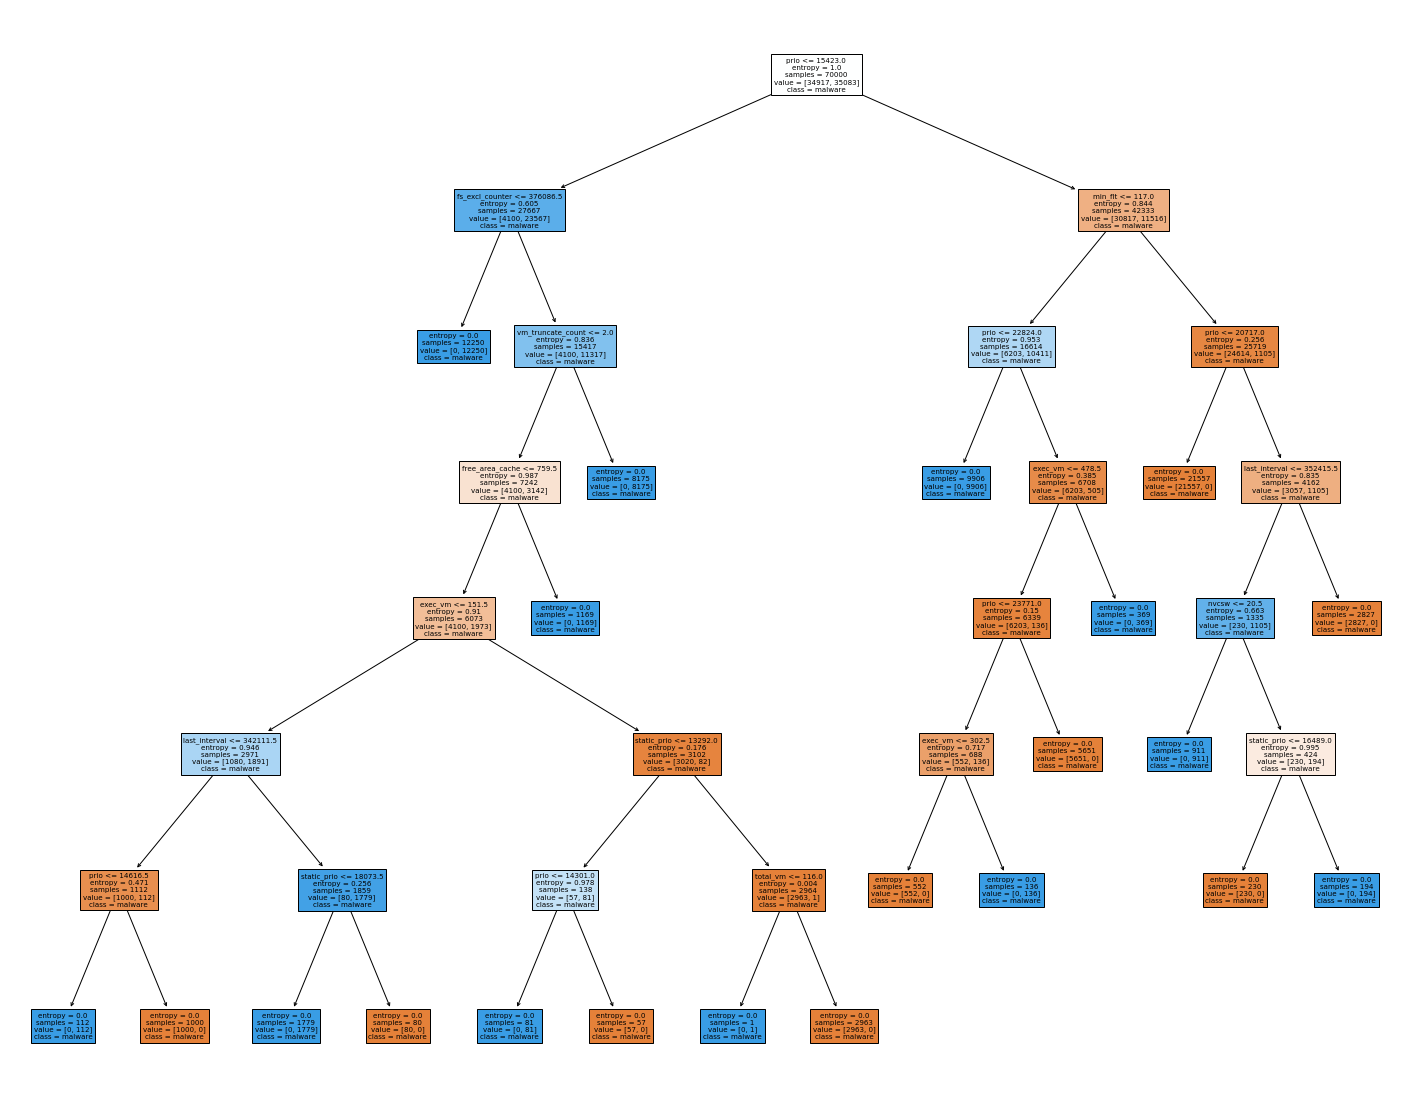

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(obj_1,
                   feature_names=data1.columns,  
                   class_names=data1.classification,
                   filled=True)

In [ ]:
print(accuracy_train)
print(accuracy)

[61.78285714285714, 51.71, 100.0]
[61.916666666666664, 52.17, 100.0]


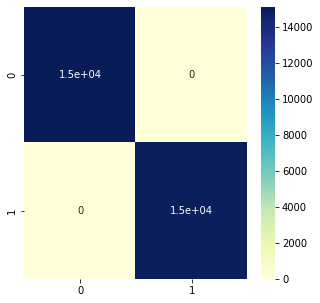

In [ ]:
 plt.figure(figsize = (5, 5))
sns.heatmap(confusion_mat, annot = True, cmap = "YlGnBu")

**RANDOM FOREST**

In [ ]:
forest_obj = RandomForestClassifier()
trained_model = forest_obj.fit(X_train, y_train)

predictions = trained_model.predict(X_test)

accuracy_train.append(forest_obj.score(X_train, y_train)*100)
accuracy.append(forest_obj.score(X_test, y_test)*100)
print(forest_obj.score(X_train, y_train))
print(forest_obj.score(X_test, y_test))

1.0
1.0


In [ ]:
print(accuracy_train)
print(accuracy)


[61.78285714285714, 51.71, 100.0, 100.0]
[61.916666666666664, 52.17, 100.0, 100.0]


**LOGISTIC REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
logistic_obj = LogisticRegression()
trained_model = logistic_obj.fit(X_train, y_train)

predictions = trained_model.predict(X_test)

confusion_mat = confusion_matrix(y_test, predictions) 
print(confusion_mat)

accuracy_train.append(logistic_obj.score(X_train, y_train)*100)
accuracy.append(logistic_obj.score(X_test, y_test)*100)
print(logistic_obj.score(X_test, y_test))

print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 1931 13037]
 [ 1460 13572]]
0.5167666666666667
[[ 1931 13037]
 [ 1460 13572]]
              precision    recall  f1-score   support

      benign       0.57      0.13      0.21     14968
     malware       0.51      0.90      0.65     15032

    accuracy                           0.52     30000
   macro avg       0.54      0.52      0.43     30000
weighted avg       0.54      0.52      0.43     30000



In [ ]:
algorithms = ['NAIVE BAYES CLASSIFIER', 'MULTINOMIAL NAIVE BAYES','DECISION TREE','RANDOM FOREST','LOGISTIC REGRESSION']

In [ ]:
print(accuracy)#testing dataset

[61.916666666666664, 52.17, 100.0, 100.0, 51.67666666666667]


In [ ]:
print(accuracy_train)

[61.78285714285714, 51.71, 100.0, 100.0, 51.75142857142857]


Text(0.5, 1.0, 'TRAINING DATA')

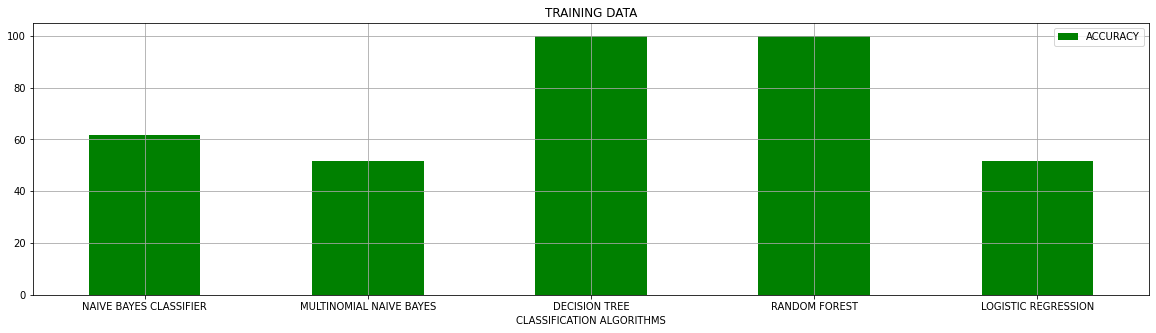

In [ ]:
df = pd.DataFrame({'CLASSIFICATION ALGORITHMS': algorithms, 'ACCURACY': accuracy_train})
ax = df.plot.bar(x = 'CLASSIFICATION ALGORITHMS', y = 'ACCURACY', rot = 0, figsize = (20, 5), color = 'green', width=0.5)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('TRAINING DATA')

Text(0.5, 1.0, 'TESTING DATA')

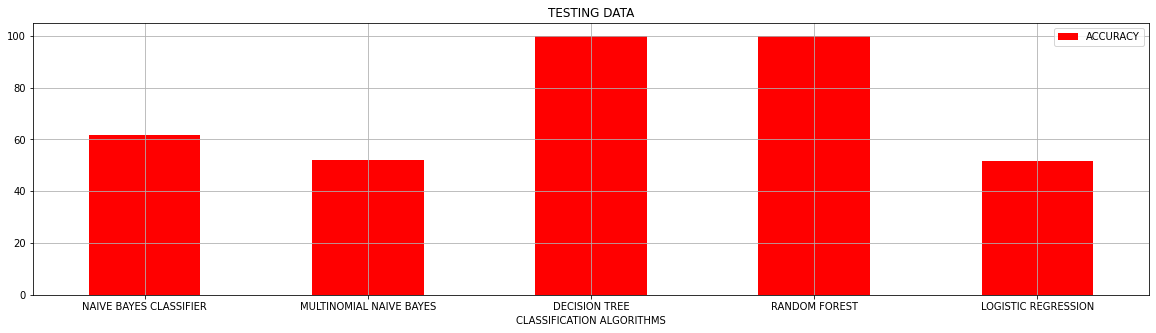

In [ ]:
df = pd.DataFrame({'CLASSIFICATION ALGORITHMS': algorithms, 'ACCURACY': accuracy})
ax = df.plot.bar(x = 'CLASSIFICATION ALGORITHMS', y = 'ACCURACY', rot = 0, figsize = (20, 5), color = 'red', width=0.5)
plt.grid()
plt.title('TESTING DATA')

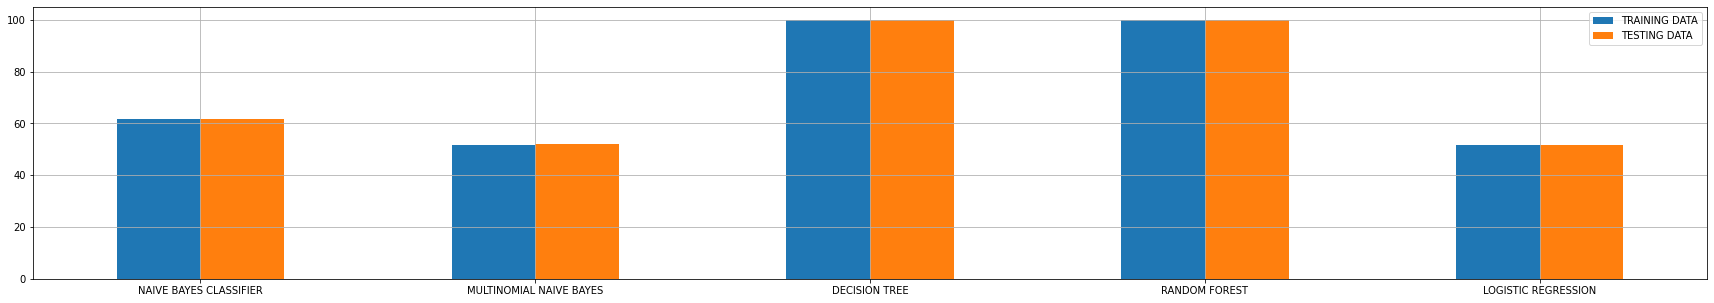

In [ ]:
df = pd.DataFrame({'TRAINING DATA': accuracy_train,
                   'TESTING DATA': accuracy}, index = algorithms)
ax = df.plot.bar(rot = 0, figsize = (30, 5))
plt.grid()
